In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sci
%matplotlib inline
data = pd.read_excel('gai.xlsx')

In [2]:
data['Temperature'].describe()

count    344.000000
mean     143.500000
std       99.448479
min      -28.000000
25%       57.750000
50%      143.500000
75%      229.250000
max      315.000000
Name: Temperature, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


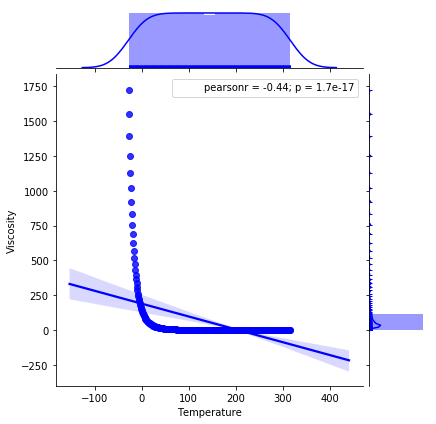

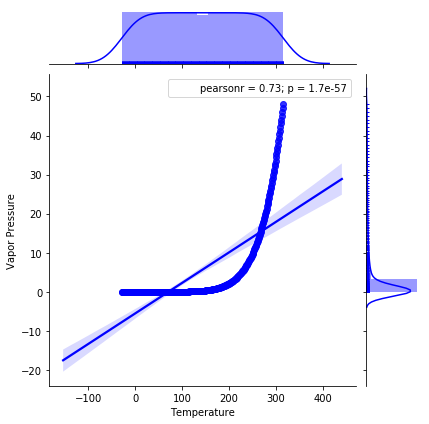

In [3]:
sns.jointplot(data['Temperature'],data['Viscosity'],  
              color = 'b', 
              stat_func=sci.pearsonr,
              kind = 'reg',
              space = 0.1,
              ratio = 5,
              marginal_kws = dict(bins=15, rug =True) 
                )
sns.jointplot(data['Temperature'], data['Vapor Pressure'],  
              color = 'b', 
              stat_func=sci.pearsonr,
              kind = 'reg',
              ratio = 5,
              marginal_kws = dict(bins=15, rug =True))                   

In [4]:
y1 = data['Viscosity'].values
y2 = data['Vapor Pressure'].values

In [5]:
x = pd.DataFrame()
x['x'] = data['Temperature'] + np.abs(data['Temperature'].min()) + 1
# x['x'] = data['Temperature'] + 29
x['x2']= x['x'] ** 2
x['1/x'] = 1/x['x']
x['1/x2']= 1/x['x'] ** 2
x['1/x3']= 1/x['x'] ** 3
x['1/x4']= 1/x['x'] ** 4
x['1/x5']= 1/x['x'] ** 5
x['1/x6']= 1/x['x'] ** 6
x['lnx']= np.log(x['x'])
x['1/x * lnx'] =x['1/x']*x['lnx']
x['1/x2 * lnx'] =x['1/x2']*x['lnx']
x['1/x3 * lnx'] =x['1/x3']*x['lnx']
x['1/x4 * lnx'] =x['1/x4']*x['lnx']
x['1/x5 * lnx'] =x['1/x5']*x['lnx']
x['1/x6 * lnx'] =x['1/x6']*x['lnx']

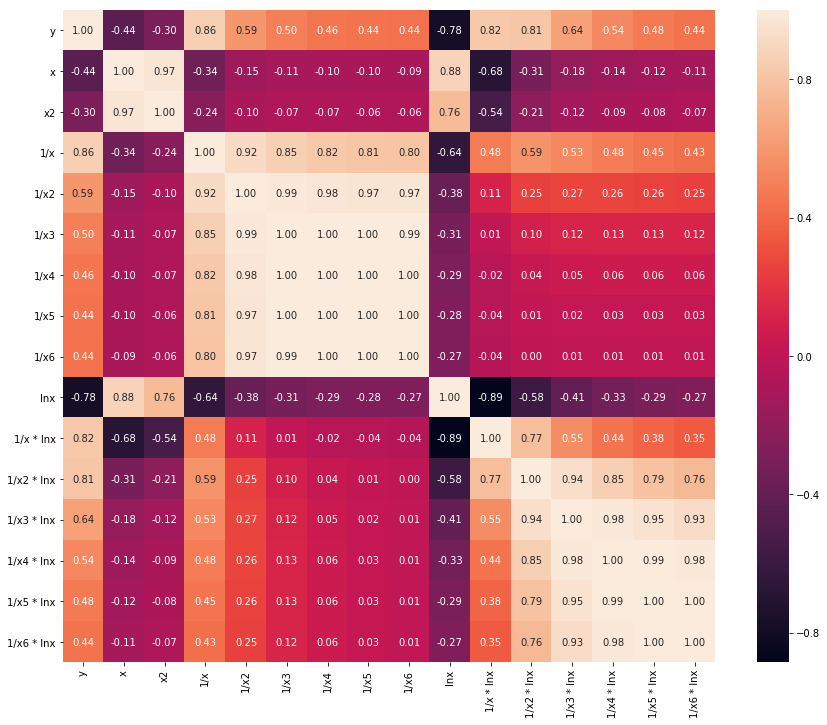

In [6]:
x.insert(0, 'y', y1)
corrmat = x.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f')

In [7]:
y=x.pop('y')
lr=LinearRegression()
lr.fit(x, y)
print(np.mean(np.abs(lr.predict(x) - y)))  #绝对平均误差
print(lr.score(x, y))  #精度

0.030741449004485825
0.9999997972779544


In [8]:
# 自变量系数
lr.coef_

array([-1.75672395e+00,  6.09431099e-04, -1.76772037e+06, -4.12866808e+07,
       -8.86186507e+07,  1.29523580e+08, -1.57510274e+07,  1.79119160e+07,
        1.44036067e+03,  3.85714696e+05,  1.50363236e+07,  9.54747715e+07,
        7.67647361e+07, -2.21153905e+06,  1.11746052e+07])

In [9]:
# 偏置
lr.intercept_

-9695.113411455917

In [10]:
x = pd.DataFrame()
x['x'] = data['Temperature'] + np.abs(data['Temperature'].min()) + 1
# x['x'] = data['Temperature'] + 29
x['x2']= x['x'] ** 2
x['x3']= x['x'] ** 3
x['x4']= x['x'] ** 4
x['x5']= x['x'] ** 5
x['x6']= x['x'] ** 6
x['x7']= x['x'] ** 7

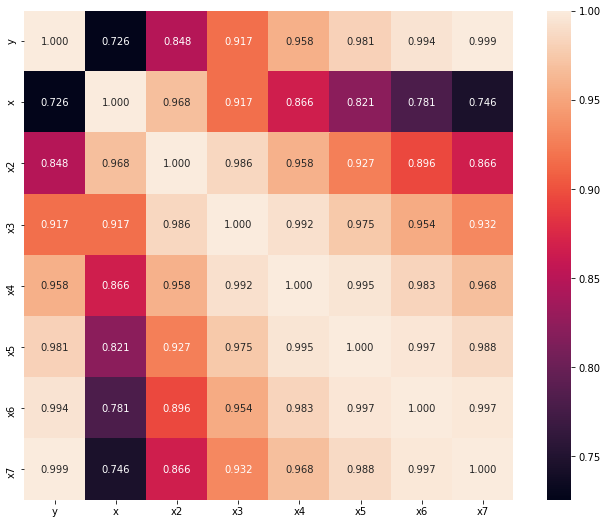

In [11]:
x.insert(0, 'y', y2)
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.3f')

In [12]:
y = x.pop('y')
lr=LinearRegression()
# lr=Lasso()
lr.fit(x, y)
print(np.mean(np.abs(lr.predict(x) - y)))  #绝对平均误差
print(lr.score(x, y)) #精度

0.005675226974400081
0.9999988107762622


In [13]:
# 自变量系数
lr.coef_

array([ 5.63457709e-07,  1.71830327e-05, -5.17975453e-07,  5.85325991e-09,
       -2.86221393e-11,  4.68988235e-14,  7.96346496e-17])

In [14]:
# 偏置
lr.intercept_

-0.004152096918804027